# Online Retail Data Analysis

## Introduction
This project focuses on analyzing online retail data to extract insights about customer behavior, product performance, and sales trends. We will leverage data analytics and machine learning techniques to explore the dataset and uncover key patterns.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format  #info: Format floats to show 2 decimal places for better readability

# Show all columns on output
pd.set_option('display.max_columns', 999)  #info: Display all columns in DataFrame outputs for visibility


# Data Exploration

In [2]:
df = pd.read_excel("online_retail_II.xlsx",sheet_name =0)

In [3]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


# Data Cleaning

In [6]:
# check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [7]:
# Description and Customer ID have huge number of null value

In [8]:
# drop rows with missing values (or use df.fillna(value) to fill)
df = df.dropna()  # caution: this drops all rows with any missing value

In [9]:
# check for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# remove duplicates
df = df.drop_duplicates()

Number of duplicate rows: 6771


In [10]:
# convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Exploratory Analysis

In [11]:
# descriptive statistics
print(df.describe(include='all'))  # include='all' shows stats for categorical columns too

                    Invoice StockCode                         Description  \
count             410763.00    410763                              410763   
unique             23587.00      4031                                4459   
top               500356.00    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq                 251.00      3199                                3199   
mean                    NaN       NaN                                 NaN   
min                     NaN       NaN                                 NaN   
25%                     NaN       NaN                                 NaN   
50%                     NaN       NaN                                 NaN   
75%                     NaN       NaN                                 NaN   
max                     NaN       NaN                                 NaN   
std                     NaN       NaN                                 NaN   

                   Quantity                    InvoiceDate  \
count        

# Distribution of Quantities

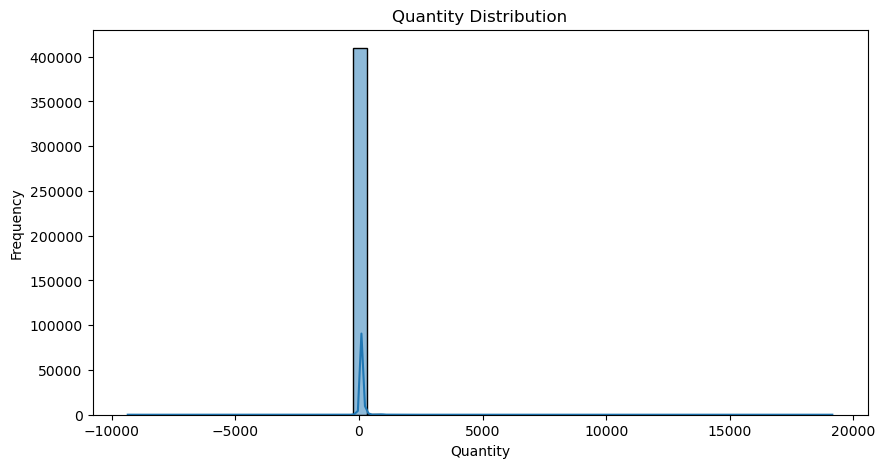

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Total Sales Over Time:

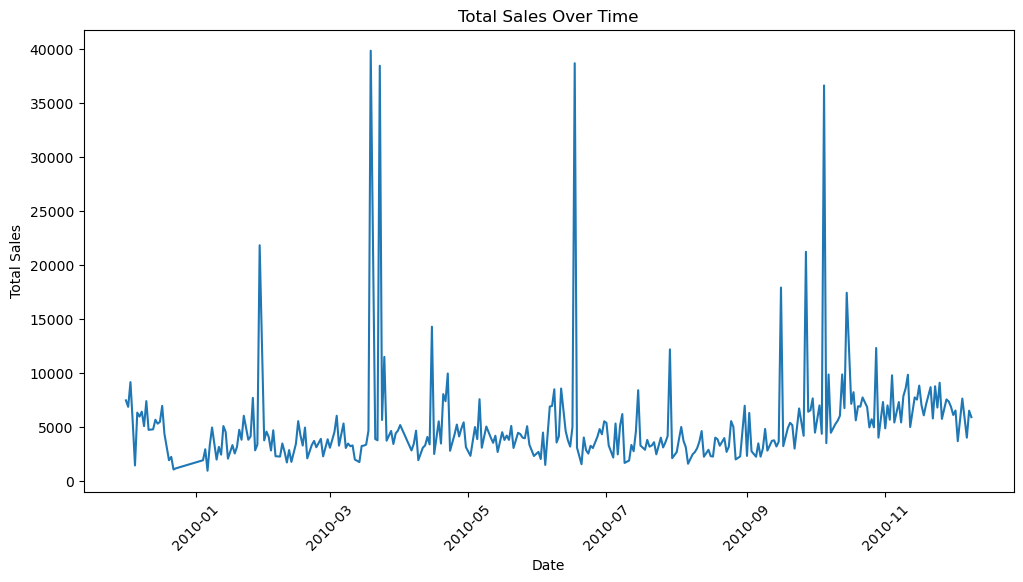

In [13]:
sales_over_time = df.groupby(df['InvoiceDate'].dt.date)['Price'].sum()
plt.figure(figsize=(12, 6))
sales_over_time.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


# Sales By Country 

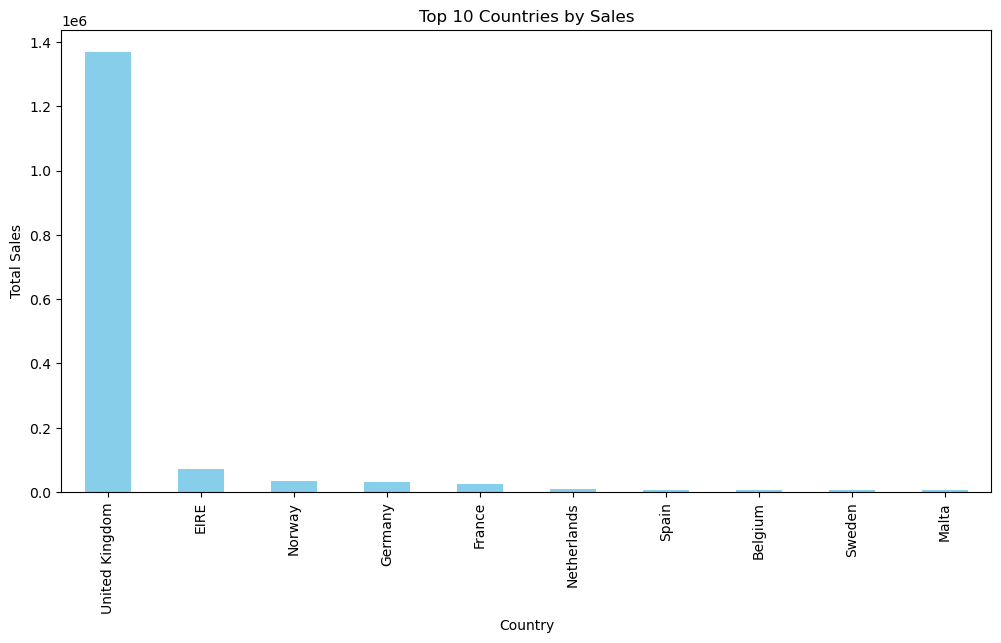

In [14]:
sales_by_country = df.groupby('Country')['Price'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sales_by_country.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

In [15]:
#Identify Outliers: Use boxplots to identify outliers in numerical columns like Price and Quantity.

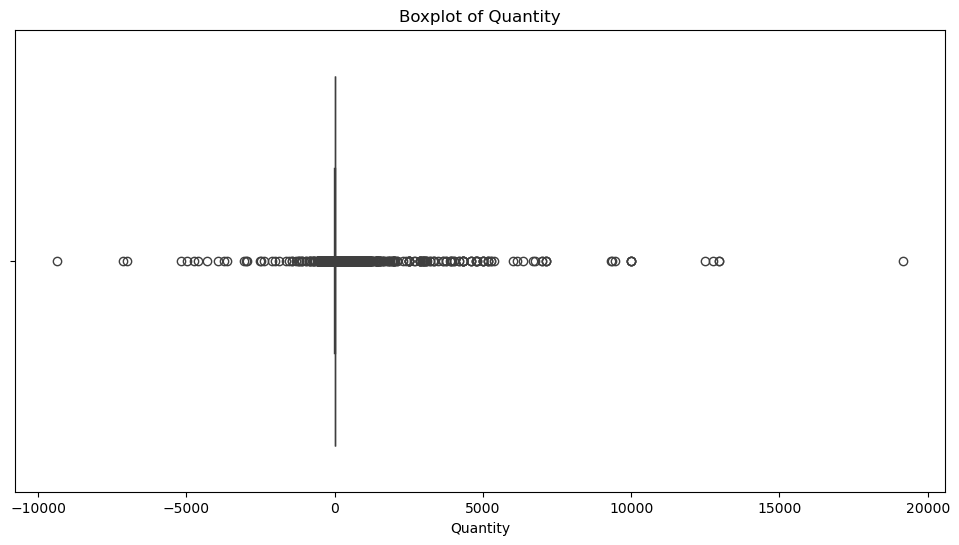

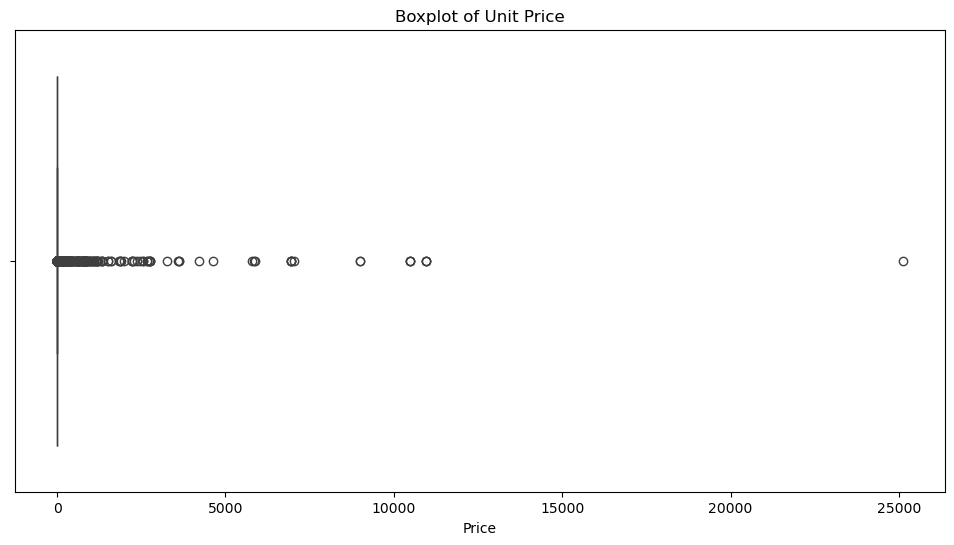

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Unit Price')
plt.show()


In [17]:
df.describe(include='O')  #info: Provides descriptive statistics for object-type (categorical) columns like count, unique values, most frequent (top) value, and its frequency.

,Invoice,StockCode,Description,Country
count,410763,410763,410763,410763
unique,23587,4031,4459,37
top,500356,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,251,3199,3199,372705


In [18]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [19]:
df[df["Quantity"] < 0].head(10) #checking Negative Quantity

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [20]:
df["Invoice"] = df["Invoice"].astype("str") # short info: Convert 'Invoice' column to string type for string operations.
df[df["Invoice"].str.match("^\\d{6}$") == False] ## short info: Filter rows with 'Invoice' values that are not exactly 6 digits long.

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [21]:
#Replace all digits in 'Invoice' with an empty string and get unique non-numeric values.
df["Invoice"].str.replace("[0-9]", "", regex=True).unique() 

array(['', 'C'], dtype=object)

In [22]:
# short info: Filter rows where 'Invoice' values start with the letter 'A'.
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [23]:
# Convert 'StockCode' to string type, then filter for unique 'StockCode' values that are neither exactly 5 digits nor 5 digits followed by letters.

df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'M', 'C2', 'BANK CHARGES', 'TEST001', 'TEST002',
       'PADS', 'ADJUST', 'ADJUST2', 'SP1002'], dtype=object)

In [24]:
#finding above funcky stockcode that do not follow pattern with some of do not have customer etc
#checking every non match if they imp or not

In [25]:
df[df["StockCode"].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


# Data Cleaning 

In [26]:
cleaned_df = df.copy()

In [27]:
# Convert 'Invoice' to string type, create a mask for rows with exactly 6-digit invoices, and filter 'cleaned_df' based on this mask.


In [28]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [29]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df["StockCode"].str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [30]:
import warnings  # short info: Import the warnings library to control warning messages.
warnings.filterwarnings("ignore")  # short info: Suppress all warning messages.

In [31]:
cleaned_df.dropna(subset=["Customer ID"], inplace=True)

In [32]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,399594.00,399594,399594.00,399594.00
mean,13.80,2010-07-01 04:54:58.004474880,3.00,15366.65
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 13:42:00,1.25,13995.00
50%,5.00,2010-07-09 10:26:00,1.95,15311.00
75%,12.00,2010-10-14 14:08:00,3.75,16809.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.80,NaN,4.31,1678.23


In [33]:
# short info: Calculate the number of rows in 'cleaned_df' where the 'Price' column is equal to 0.

In [34]:
len(cleaned_df[cleaned_df["Price"] == 0])

28

In [35]:
#dealing issue having 0 value

In [36]:
cleaned_df["Price"].min()

0.0

In [37]:
len(cleaned_df)/len(df) # drop 23 % records for 

0.97280913811614

In [38]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0.0]

# Feature Engineering

In [39]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [40]:
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index=False) \
    .agg(
        MonetaryValue=("SalesLineTotal", "sum"),
        Frequency=("Invoice", "nunique"),
        LastInvoiceDate=("InvoiceDate", "max")
    )

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [41]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


In [42]:
#Finding Outlier

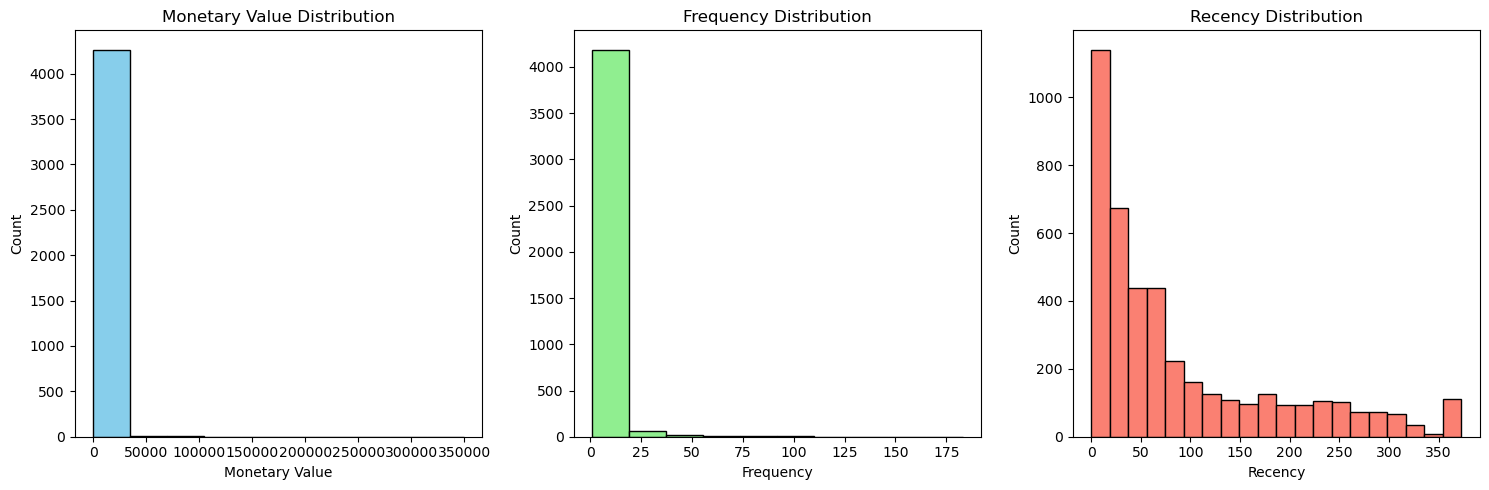

In [43]:
# Set the figure size for the entire plot
plt.figure(figsize=(15, 5))  # short info: Create a figure with a width of 15 inches and a height of 5 inches.

# Subplot 1: Histogram of Monetary Value
plt.subplot(1, 3, 1)  # short info: Create a 1x3 grid of subplots, and select the 1st subplot.
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')  # short info: Create a histogram for 'MonetaryValue' with 10 bins.
plt.title('Monetary Value Distribution')  # short info: Set the title for the first subplot.
plt.xlabel('Monetary Value')  # short info: Label the x-axis.
plt.ylabel('Count')  # short info: Label the y-axis.

# Subplot 2: Histogram of Frequency
plt.subplot(1, 3, 2)  # short info: Select the 2nd subplot in the 1x3 grid.
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')  # short info: Create a histogram for 'Frequency' with 10 bins.
plt.title('Frequency Distribution')  # short info: Set the title for the second subplot.
plt.xlabel('Frequency')  # short info: Label the x-axis.
plt.ylabel('Count')  # short info: Label the y-axis.

# Subplot 3: Histogram of Recency
plt.subplot(1, 3, 3)  # short info: Select the 3rd subplot in the 1x3 grid.
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')  # short info: Create a histogram for 'Recency' with 20 bins.
plt.title('Recency Distribution')  # short info: Set the title for the third subplot.
plt.xlabel('Recency')  # short info: Label the x-axis.
plt.ylabel('Count')  # short info: Label the y-axis.

plt.tight_layout()  # short info: Adjust subplot parameters to give specified padding for a cleaner layout.
plt.show()  # short info: Display the plots.


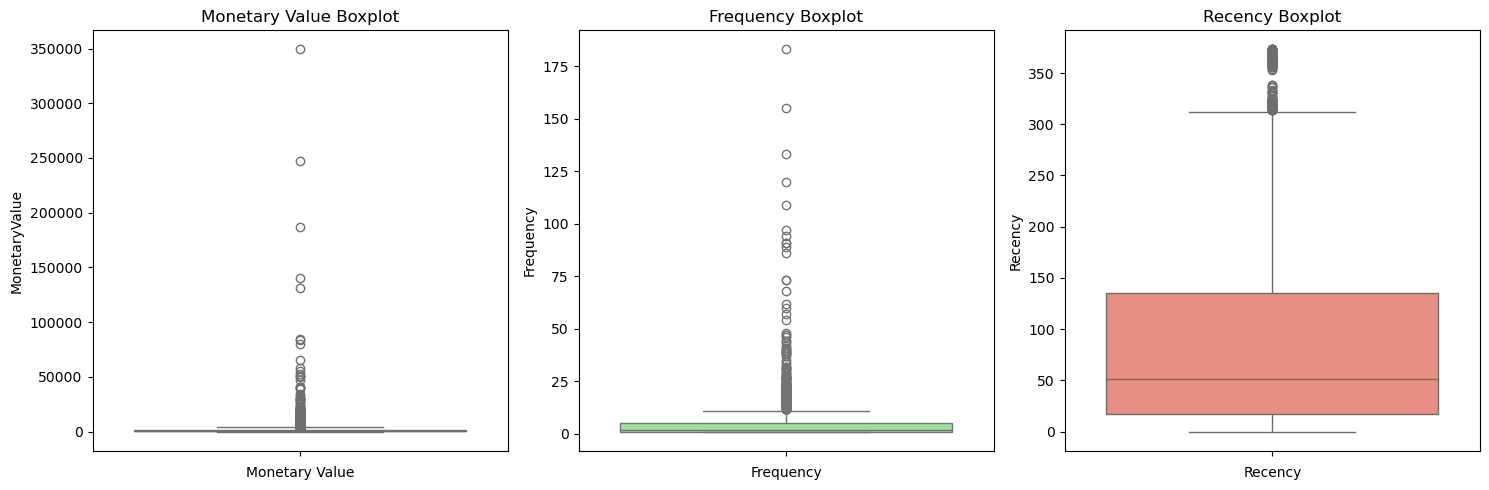

In [44]:
# Set the figure size for the entire plot
plt.figure(figsize=(15, 5))  # short info: Create a figure with a width of 15 inches and a height of 5 inches.

# Subplot 1: Boxplot of Monetary Value
plt.subplot(1, 3, 1)  # short info: Create a 1x3 grid of subplots, and select the 1st subplot.
sns.boxplot(data=aggregated_df['MonetaryValue'], color='skyblue')  # short info: Create a boxplot for 'MonetaryValue'.
plt.title('Monetary Value Boxplot')  # short info: Set the title for the first subplot.
plt.xlabel('Monetary Value')  # short info: Label the x-axis.

# Subplot 2: Boxplot of Frequency
plt.subplot(1, 3, 2)  # short info: Select the 2nd subplot in the 1x3 grid.
sns.boxplot(data=aggregated_df['Frequency'], color='lightgreen')  # short info: Create a boxplot for 'Frequency'.
plt.title('Frequency Boxplot')  # short info: Set the title for the second subplot.
plt.xlabel('Frequency')  # short info: Label the x-axis.

# Subplot 3: Boxplot of Recency
plt.subplot(1, 3, 3)  # short info: Select the 3rd subplot in the 1x3 grid.
sns.boxplot(data=aggregated_df['Recency'], color='salmon')  # short info: Create a boxplot for 'Recency'.
plt.title('Recency Boxplot')  # short info: Set the title for the third subplot.
plt.xlabel('Recency')  # short info: Label the x-axis.

plt.tight_layout()  # short info: Adjust subplot parameters to give specified padding for a cleaner layout.
plt.show()  # short info: Display the plots.


In [45]:
#MOnetay and Freq have high outlier

In [46]:
#Establishing IQR

In [47]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()
#short conclusion: This code creates a new DataFrame, 'monetary_outliers_df', containing rows from 'aggregated_df'
#where 'MonetaryValue' values are considered outliers, defined as being greater than 1.5 times the interquartile range (IQR) 
#above the third quartile (Q3) or below 1.5 times the IQR below the first quartile (Q1).

monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,421.00,421.00,421.00,421,421.00
mean,15079.77,12198.21,17.16,2010-11-09 13:16:23.087886080,30.00
min,12357.00,3788.21,1.00,2009-12-10 18:03:00,0.00
25%,13599.00,4590.53,8.00,2010-11-08 14:14:00,3.00
50%,14936.00,6171.07,12.00,2010-11-26 12:19:00,13.00
75%,16656.00,10300.98,18.00,2010-12-06 10:03:00,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1723.92,25886.95,19.77,NaN,51.61


In [48]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14374.12,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1091.44,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4328.44,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11652.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31383.98,21.93,NaN,26.59


In [49]:
# This code creates a new DataFrame, 'non_outliers_df', by filtering out rows from 'aggregated_df' that are present in either 'monetary_outliers_df' or 'frequency_outliers_df'. 
#It then provides descriptive statistics for the resulting DataFrame, summarizing the central tendency, dispersion, and shape of the dataset's distribution for non-outlier values.

non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3810.00,3810.00,3810.00,3810,3810.00
mean,15378.29,880.96,2.87,2010-09-03 11:26:19.795275776,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13913.50,277.40,1.00,2010-07-08 15:37:30,22.00
50%,15390.50,581.12,2.00,2010-10-12 16:05:30,58.00
75%,16856.75,1256.62,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3786.70,11.00,2010-12-09 20:01:00,373.00
std,1693.11,815.59,2.25,NaN,98.10


In [50]:
#Replot boxplot using Non Outlier

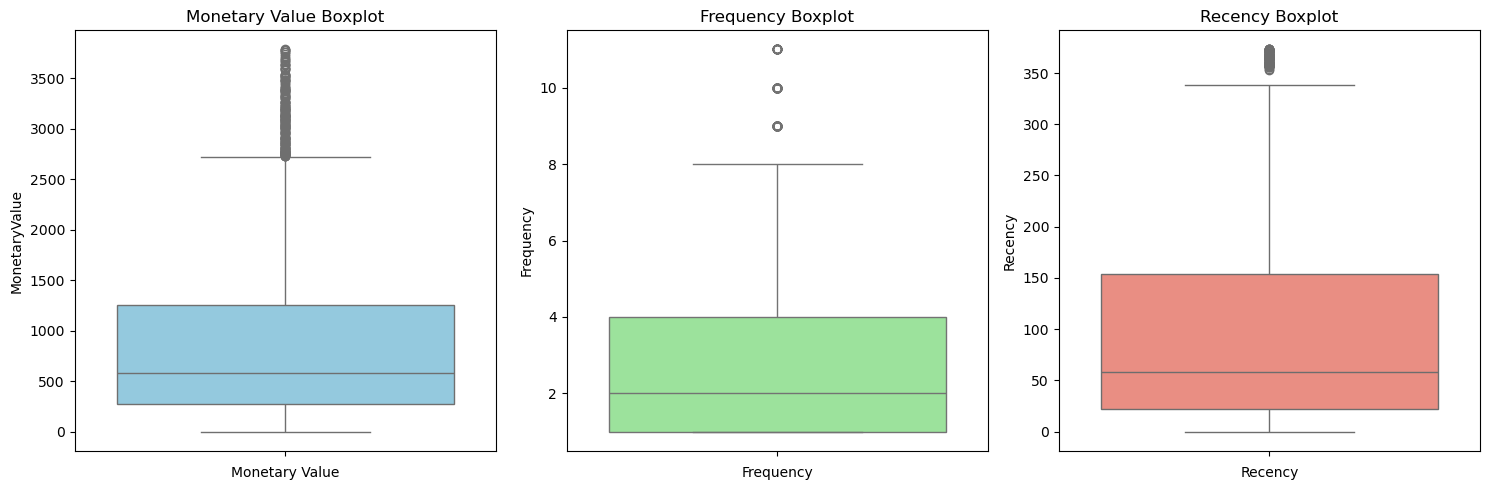

In [51]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

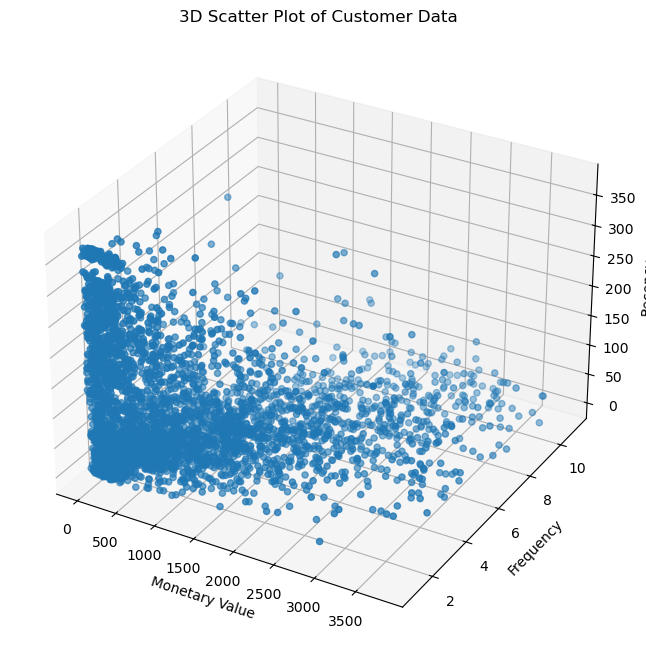

In [52]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

In [53]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data

array([[-0.87261704, -0.38523967,  0.68229934],
       [ 0.54244637, -0.38523967, -0.96930272],
       [-0.8090964 , -0.83055615, -0.24545244],
       ...,
       [-0.6179949 , -0.83055615,  2.01785409],
       [ 0.44815868, -0.38523967,  0.14196039],
       [ 1.73485643,  0.5053933 , -0.81637661]])

In [54]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.87,-0.39,0.68
1,0.54,-0.39,-0.97
2,-0.81,-0.83,-0.25
3,1.64,-0.39,-0.56
4,-0.71,-0.83,-0.89
...,...,...,...
4280,-0.32,1.40,-0.82
4281,-0.58,-0.83,-0.32
4282,-0.62,-0.83,2.02
4283,0.45,-0.39,0.14


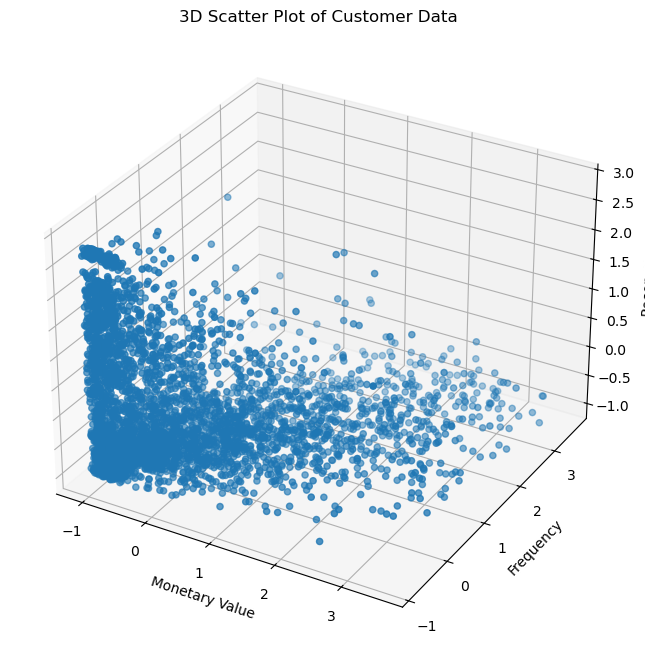

In [55]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

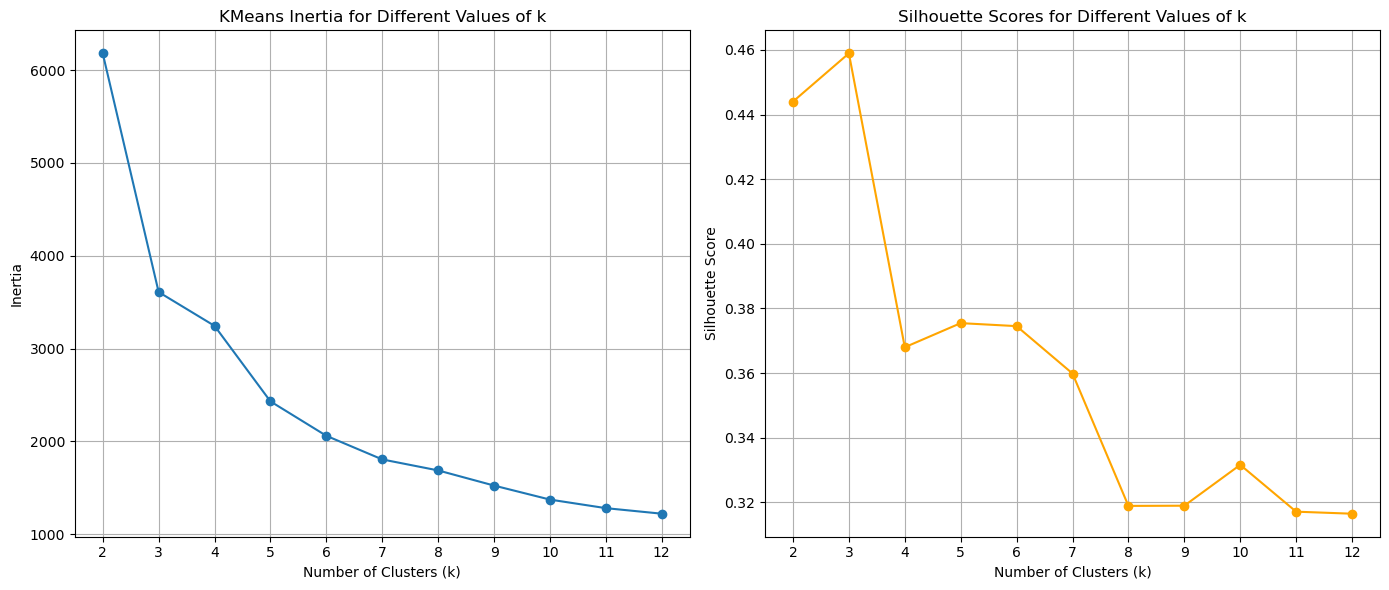

In [56]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

# Silhouette Score

In [57]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([3, 0, 0, ..., 1, 0, 2])

In [58]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,3
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,0
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,2
4,12351.00,300.93,1,2010-11-29 15:23:00,10,0
...,...,...,...,...,...,...
4280,18283.00,619.37,6,2010-11-22 15:30:00,17,0
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,0
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,0


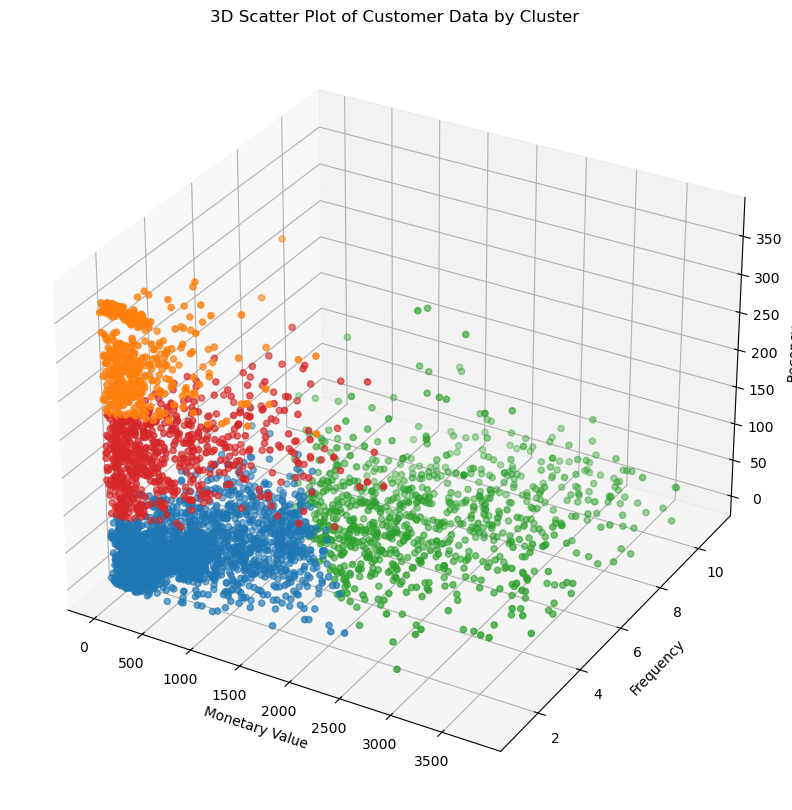

In [59]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], 
                     non_outliers_df['Frequency'], 
                     non_outliers_df['Recency'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

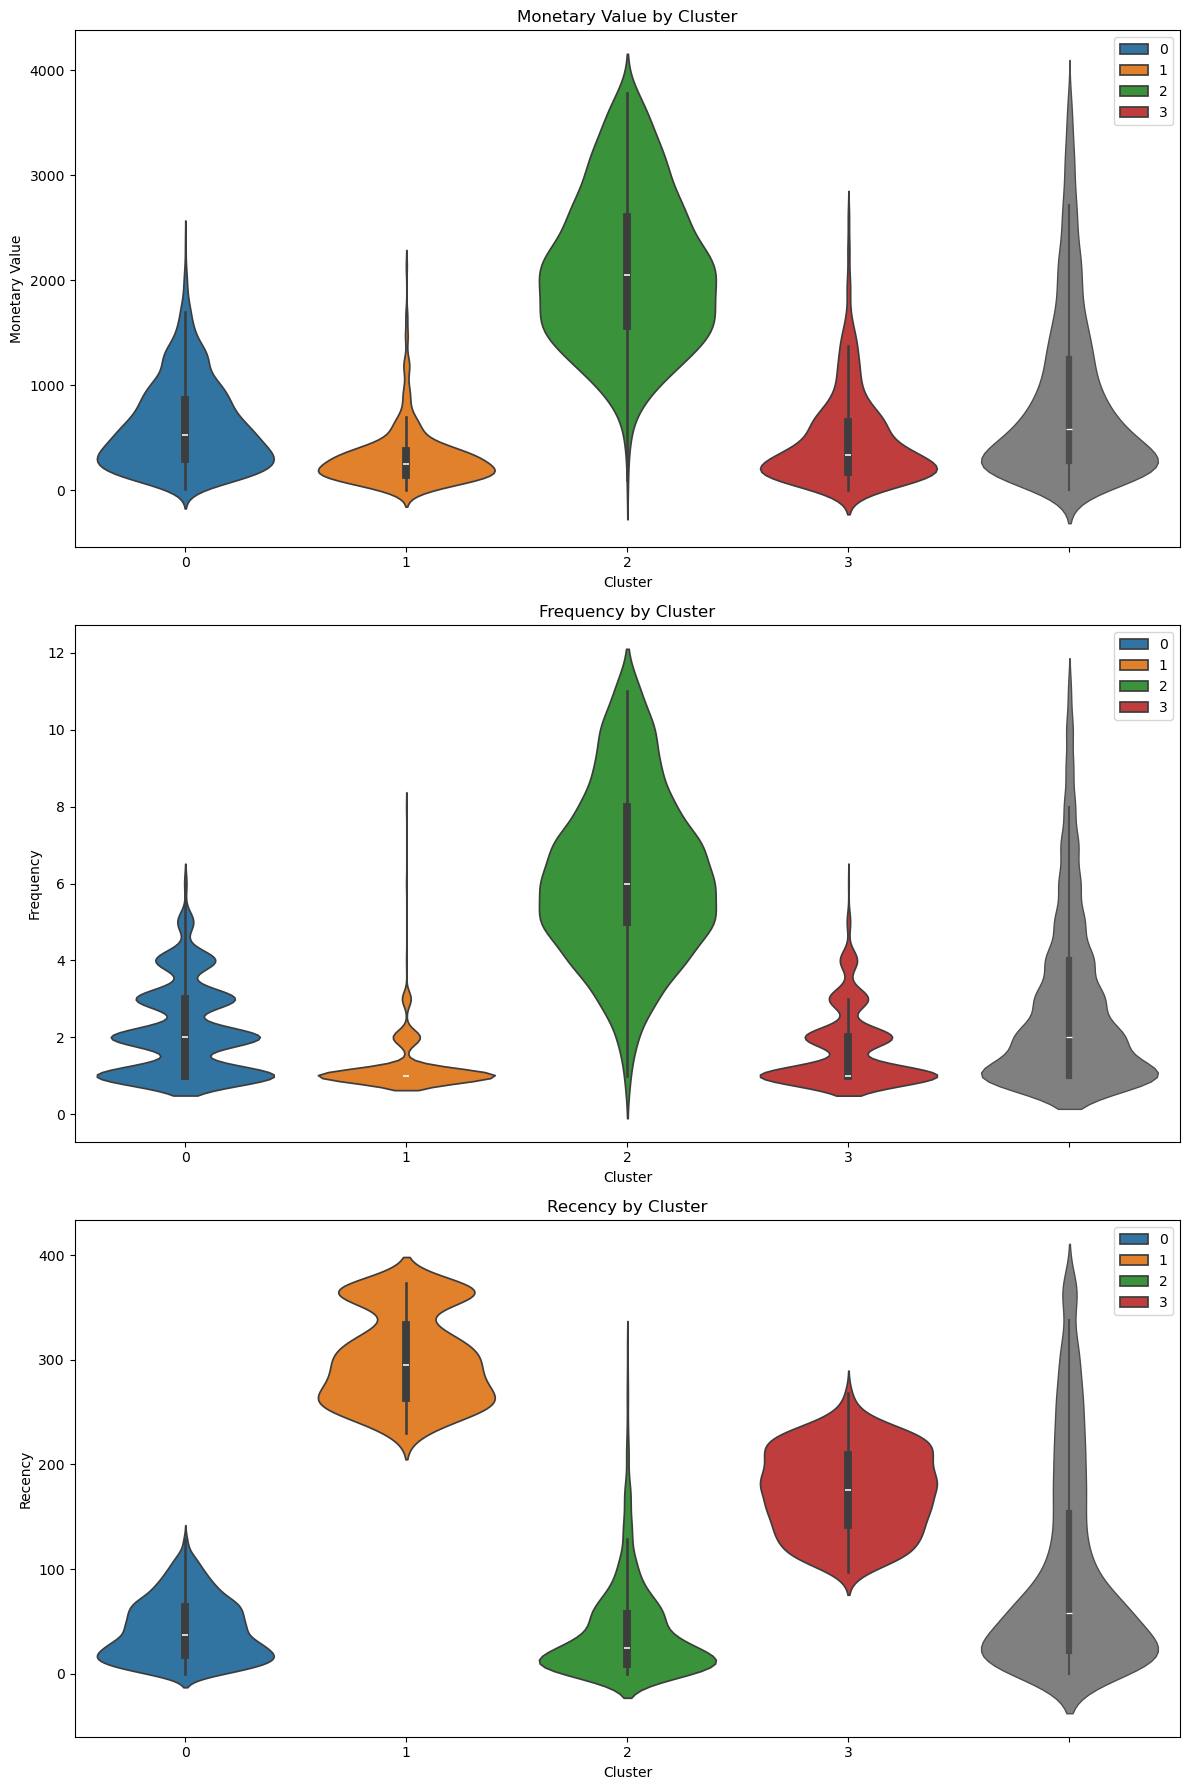

In [60]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

### Customer Segmentation Clusters

#### Cluster 0 (Blue): "Retain"
- **Rationale**: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
- **Action**: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

---

#### Cluster 1 (Orange): "Re-Engage"
- **Rationale**: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
- **Action**: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

---

#### Cluster 2 (Green): "Nurture"
- **Rationale**: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
- **Action**: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

---

#### Cluster 3 (Red): "Reward"
- **Rationale**: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
- **Action**: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

---

### Summary of Cluster Names:
- **Cluster 0 (Blue)**: "Retain"
- **Cluster 1 (Orange)**: "Re-Engage"
- **Cluster 2 (Green)**: "Nurture"
- **Cluster 3 (Red)**: "Reward"


In [61]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7539.84,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4776.50,23,2010-10-29 14:17:00,41,-3


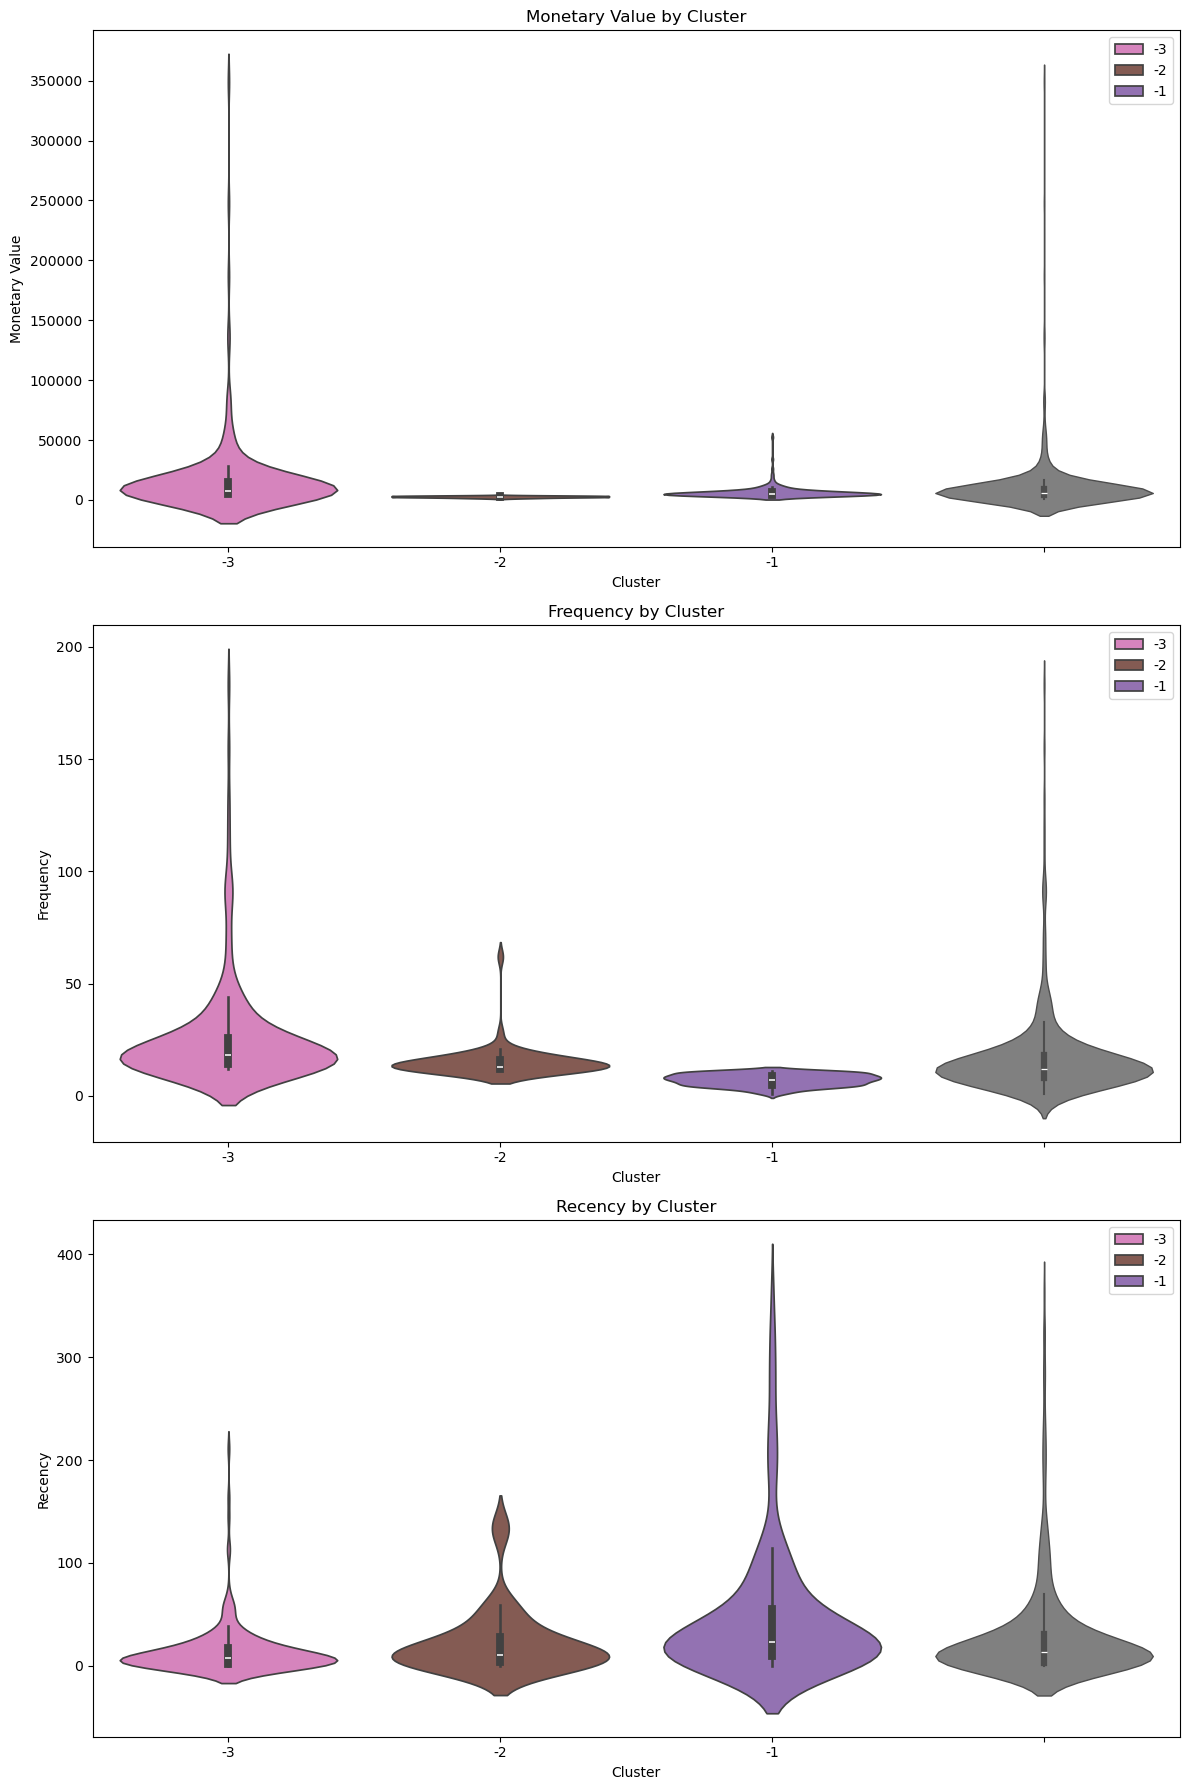

In [62]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

### Customer Segmentation Outlier Clusters

#### Cluster -1 (Monetary Outliers): "PAMPER"
- **Characteristics**: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.
- **Potential Strategy**: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

---

#### Cluster -2 (Frequency Outliers): "UPSELL"
- **Characteristics**: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.
- **Potential Strategy**: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

---

#### Cluster -3 (Monetary & Frequency Outliers): "DELIGHT"
- **Characteristics**: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.
- **Potential Strategy**: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.


In [63]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [64]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,3
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,0
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,2
4,12351.00,300.93,1,2010-11-29 15:23:00,10,0
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7539.84,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4776.50,23,2010-10-29 14:17:00,41,-3


In [65]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.00,169.36,2,2010-06-28 13:53:00,164,3,REWARD
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.00,221.16,1,2010-09-27 14:59:00,73,0,RETAIN
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,2,NURTURE
4,12351.00,300.93,1,2010-11-29 15:23:00,10,0,RETAIN
...,...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3,DELIGHT
4236,18225.00,7539.84,15,2010-12-09 15:46:00,0,-3,DELIGHT
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3,DELIGHT
4241,18231.00,4776.50,23,2010-10-29 14:17:00,41,-3,DELIGHT


# Visualisation

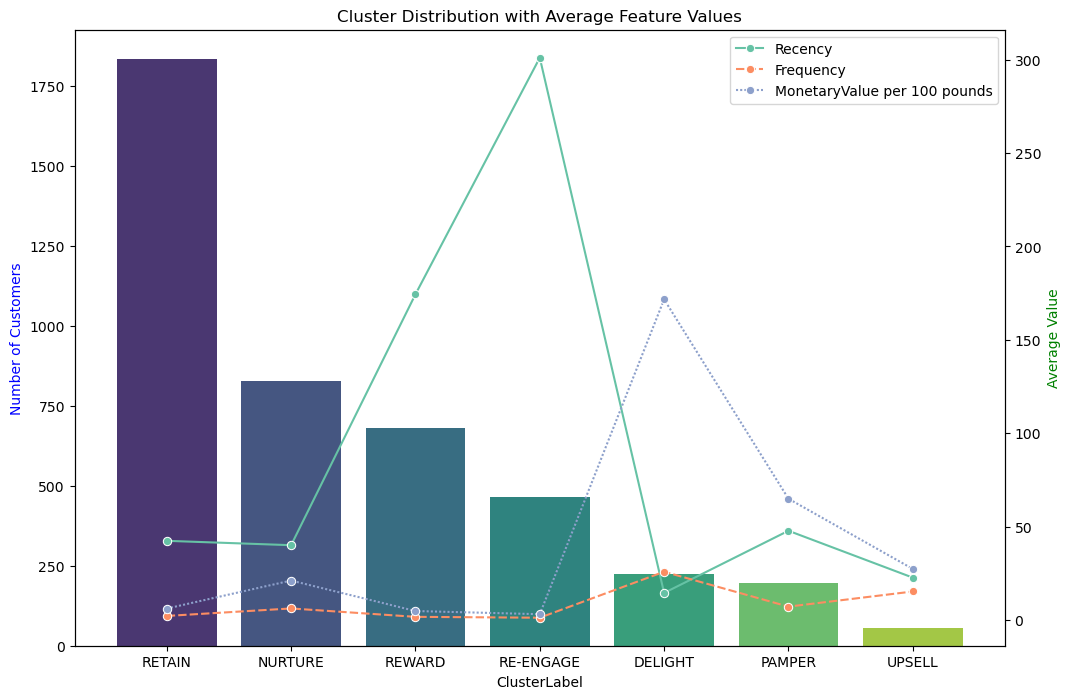

In [66]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()